In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:42<00:00, 20.6MB/s]
100% 715M/715M [00:42<00:00, 17.5MB/s]


In [4]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.0 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing Dependencies


In [17]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [15]:
print(filenames[0:5])
print(filenames[-5:])

['47224.png', '18574.png', '45565.png', '47424.png', '11880.png']
['28100.png', '14234.png', '32251.png', '28598.png', '46639.png']


Labels Processing


In [18]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [19]:
labels_df.shape

(50000, 2)

In [20]:
labels_df.head

<bound method NDFrame.head of           id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]>

In [21]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [23]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [24]:
labels_df.tail(10) #sort

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [25]:
labels_df['label'].value_counts() #counts the number of deer and all that is present in the dataset.

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [27]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [28]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [29]:
print(labels[0:5])
print(labels[-5:])


[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


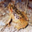

In [31]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/train/7796.png')
cv2_imshow(image)

In [32]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [33]:
id_list = list(labels_df['id'] )

In [34]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [36]:
# convert images to numpy array

train_data_folder = ('/content/train/')

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')  #using PIL lib
  image = np.array(image)
  data.append(image)





In [37]:
type(data)

list

In [38]:
len(data)

50000

In [40]:
type(data[0])

numpy.ndarray

In [41]:
data[0].shape #32*32 and 3 is coloured image or rgb image

(32, 32, 3)

In [42]:
data[0] # color ranges between 0-255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [43]:
# convert image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [45]:
type(X)

numpy.ndarray

In [46]:
print(X.shape) # images
print(Y.shape) #labels

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [48]:
#taking 20% as test data and remaining is training data
# if you run the algorithm multiple times with the same random_state value, you should obtain the same results each time.
X_train , X_test , Y_train , Y_test =train_test_split(X,Y, test_size =0.2 , random_state = 2)

In [49]:
print(X.shape , X_train.shape , X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [50]:
#scaling the data or normalization

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [52]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [53]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

Building the Neural Networks


In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
num_of_classes = 10

#setting up the layers of NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), #imput layer
    keras.layers.Dense(64, activation='relu'), # hidden layer with 64 neurons
    keras.layers.Dense(num_of_classes , activation='softmax') #output layer of 10 classes
])

In [57]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [58]:
#training the NN
model.fit(X_train_scaled , Y_train , validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 2.0510 - acc: 0.2269 - val_loss: 1.9161 - val_acc: 0.2800
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.9293 - acc: 0.2857 - val_loss: 1.9264 - val_acc: 0.2688
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9050 - acc: 0.2950 - val_loss: 1.8775 - val_acc: 0.3000
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8887 - acc: 0.3033 - val_loss: 1.8889 - val_acc: 0.2955
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8812 - acc: 0.3077 - val_loss: 1.8993 - val_acc: 0.2842
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8723 - acc: 0.3084 - val_loss: 1.8577 - val_acc: 0.3142
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8642 - acc: 0.3124 - val_loss: 1.8707 - val_acc: 0.3002
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

# ResNet50

In [59]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [60]:
#loading resnet50

convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [61]:
# adding our own layers in the model
num_of_classes = 10

model = models.Sequential() # within the sequential layer we will stack all the layers
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [62]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [63]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 472s 383ms/step - loss: 2.2246 - acc: 0.1903 - val_loss: 2.9143 - val_acc: 0.1503
Epoch 2/10
1125/1125 [==============================] - 425s 378ms/step - loss: 1.6281 - acc: 0.3864 - val_loss: 1.6077 - val_acc: 0.4470
Epoch 3/10
1125/1125 [==============================] - 425s 377ms/step - loss: 1.3112 - acc: 0.5325 - val_loss: 1.1268 - val_acc: 0.6047
Epoch 4/10
1125/1125 [==============================] - 425s 377ms/step - loss: 1.1219 - acc: 0.6152 - val_loss: 0.9183 - val_acc: 0.6740
Epoch 5/10
1125/1125 [==============================] - 432s 384ms/step - loss: 0.9954 - acc: 0.6599 - val_loss: 0.9597 - val_acc: 0.6578
Epoch 6/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.8974 - acc: 0.6958 - val_loss: 0.7544 - val_acc: 0.7320
Epoch 7/10
1125/1125 [==============================] - 432s 384ms/step - loss: 0.8228 - acc: 0.7284 - val_loss: 0.8791 - val_acc: 0.7053
Epoch 8/10
1125/1125 [============

In [64]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 115ms/step - loss: 0.9386 - acc: 0.7172
Test Accuracy = 0.717199981212616


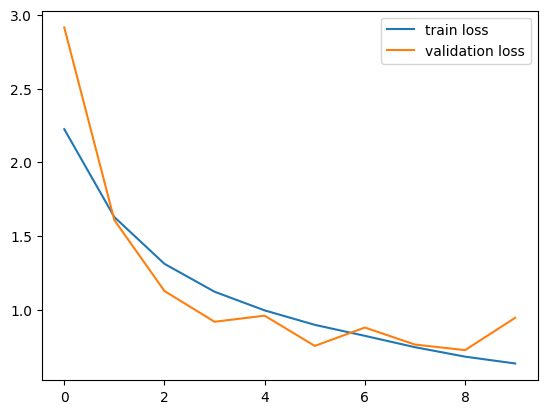

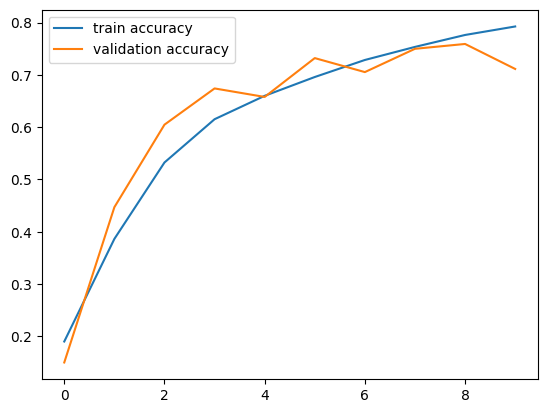

In [65]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

So the observation is that the pre-trained model when trained with Neural Network gave an accuracy of around 31% and when that pre-trained model is trained with ResNet50 the accuracy increases to 71%.


# Now in future work I will predict the images using this ReNet50